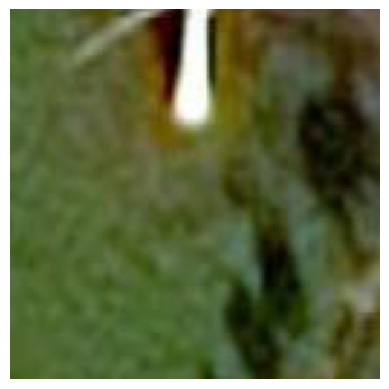

In [3]:
# Importation de librairies
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim 
import os

# Visualisation des données avec PyTorch
from PIL import Image
import matplotlib.pyplot as plt

# Chemin d'accès aux données dans Google Drive
data_dir = 'C:/Users/radii/OneDrive/Bureau/Deep Learning/Data_Projet_1_Defi_IA (1)/Data_Projet_1_Defi_IA'

img_path = os.path.join(data_dir, 'train', 'target', 'C254372785.jpg')

img = Image.open(img_path)

# Afficher l'image
plt.imshow(img)
plt.axis('off')  # Masquer les axes
plt.show()

In [4]:
from PIL import Image
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Définir la transformation ToTensor
to_tensor = transforms.ToTensor()

In [5]:
# Transformer l'image en tenseur PyTorch (déjà fait précédemment)
img_tensor = to_tensor(img)

# Afficher la taille de l'image sous forme de tenseur
print("Taille de l'image : ", img_tensor.shape)

# Afficher le deuxième canal (équivalent de x[:,:,1] en numpy)
print("Deuxième canal de l'image :", img_tensor[1, :, :])

Taille de l'image :  torch.Size([3, 128, 128])
Deuxième canal de l'image : tensor([[0.4039, 0.4039, 0.4078,  ..., 0.3412, 0.3490, 0.3490],
        [0.4078, 0.4039, 0.4039,  ..., 0.3569, 0.3608, 0.3608],
        [0.4118, 0.4078, 0.4039,  ..., 0.3647, 0.3608, 0.3569],
        ...,
        [0.3843, 0.3843, 0.3882,  ..., 0.3647, 0.3451, 0.3373],
        [0.3686, 0.3725, 0.3765,  ..., 0.3686, 0.3490, 0.3412],
        [0.3608, 0.3608, 0.3686,  ..., 0.3765, 0.3569, 0.3451]])


In [7]:
import warnings

def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

warnings.filterwarnings("ignore")

In [8]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Paramètres
nb_classes = 2
batch_size = 100
img_width = 128
img_height = 128

data_dir = 'C:/Users/radii/OneDrive/Bureau/Deep Learning/Data_Projet_1_Defi_IA (1)/Data_Projet_1_Defi_IA'
# Définir les transformations pour normaliser les images
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize((img_width, img_height)),  # Redimensionner les images
        transforms.ToTensor(),  # Convertir les images en tenseur PyTorch
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normaliser les images
    ]),
    'val': transforms.Compose([
        transforms.Resize((img_width, img_height)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Charger les ensembles d'entraînement et de validation
train_dataset = datasets.ImageFolder(data_dir + '/train', transform=data_transforms['train'])
val_dataset = datasets.ImageFolder(data_dir + '/validation', transform=data_transforms['val'])

# Créer les DataLoaders pour charger les images par lots
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Obtenir les classes
class_names = train_dataset.classes
print(f"Classes: {class_names}")


Classes: ['other', 'target']


In [9]:
import torch.nn.functional as F

In [10]:
class MyNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.bn1 = nn.BatchNorm2d(6)  # Normalisation par lot
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 4, 3)
        self.bn2 = nn.BatchNorm2d(4)  # Normalisation par lot
        self.fc1 = nn.Linear(4 * 30 * 30, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)
        self.dropout = nn.Dropout(0.5)

    def forward(self, x):
        x = self.pool(self.bn1(F.relu(self.conv1(x))))
        x = self.pool(self.bn2(F.relu(self.conv2(x))))
        x = torch.flatten(x, 1)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

Using device: cpu
Epoch 1/5
Epoch 1, Loss : 0.1938982054872333, Accuracy: 92.61%
Validation Loss: 0.15051087208092212, Validation Accuracy: 93.92%
Epoch 2/5
Epoch 2, Loss : 0.13487197171200202, Accuracy: 95.18%
Validation Loss: 0.13372696109116078, Validation Accuracy: 94.82%
Epoch 3/5
Epoch 3, Loss : 0.11619961165581826, Accuracy: 95.91%
Validation Loss: 0.13871536187827588, Validation Accuracy: 94.80%
Epoch 4/5
Epoch 4, Loss : 0.09781873101563437, Accuracy: 96.59%
Validation Loss: 0.1254675130546093, Validation Accuracy: 95.14%
Epoch 5/5
Epoch 5, Loss : 0.0869683282893937, Accuracy: 96.97%
Validation Loss: 0.12589378926903008, Validation Accuracy: 95.36%


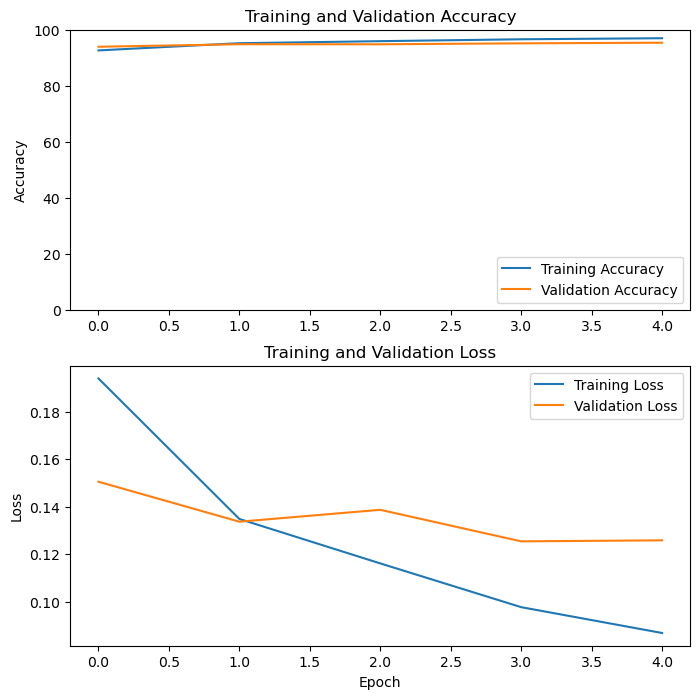

In [35]:
# Déterminer si on utilise le GPU ou le CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Initialiser le modèle et le transférer sur le GPU si disponible
model = MyNet().to(device)

# Définir l'optimiseur après avoir déplacé le modèle sur le GPU
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Définir la fonction de perte et la transférer sur le GPU
criterion = nn.CrossEntropyLoss().to(device)

# Taille des batchs et nombre d'epochs
epochs = 5
train_losses = []
val_losses = []
train_accuracies = []
val_accuracies = []

# Boucle d'entraînement
for epoch in range(epochs):
    print(f"Epoch {epoch+1}/{epochs}")

    model.train()  # Mettre le modèle en mode entraînement
    running_loss = 0.0  # Initialiser la perte cumulative
    correct_train = 0
    total_train = 0

    for images, labels in train_loader:
        # Transférer les données sur le GPU de manière automatique
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()  # Réinitialiser les gradients

        # Propagation avant (forward pass)
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Propagation arrière (backward pass) et mise à jour des poids
        loss.backward()
        optimizer.step()

        # Suivi de la perte et de la précision
        running_loss += loss.item()  # Ajouter la perte pour ce batch
        _, predicted = torch.max(outputs, 1)
        correct_train += (predicted == labels).sum().item()
        total_train += labels.size(0)

    # Afficher la perte et l'accuracy pour cette époque
    train_losses.append(running_loss / len(train_loader))
    train_accuracies.append(100 * correct_train / total_train)
    print(f"Epoch {epoch+1}, Loss : {running_loss/len(train_loader)}, Accuracy: {100 * correct_train / total_train:.2f}%")
    
 

    # Validation
    model.eval()  # Mettre le modèle en mode évaluation
    running_val_loss = 0.0
    correct_val = 0
    total_val = 0

    with torch.no_grad():  # Désactiver la propagation des gradients
        for images, labels in val_loader:
            # Transférer les données de validation sur le GPU
            images, labels = images.to(device), labels.to(device)

            outputs = model(images)
            loss = criterion(outputs, labels)
             # Calculer la perte
            running_val_loss += loss.item()
            _, predicted = torch.max(outputs, 1)  # Obtenir la classe prédite
            correct_val += (predicted == labels).sum().item()
            total_val += labels.size(0)

    # Afficher les résultats de validation
    val_losses.append(running_val_loss / len(val_loader))
    val_accuracies.append(100 * correct_val / total_val)
    print(f"Validation Loss: {running_val_loss / len(val_loader)}, Validation Accuracy: {100 * correct_val / total_val:.2f}%")
# Tracer l'évolution de la perte et de l'exactitude
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([0, 100])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.title('Training and Validation Loss')
plt.show()

In [36]:
import os

# Définir la transformation pour les images de test
data_transforms['test'] = transforms.Compose([
    transforms.Resize((img_width, img_height)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

# Charger les images de test
prediction_dir = data_dir + "/test/"
test_dataset = datasets.ImageFolder(prediction_dir, transform=data_transforms['test'])
test_loader = DataLoader(test_dataset, batch_size=1, shuffle=False)

# Mettre le modèle en mode évaluation
model.eval()

# Liste pour stocker les prédictions
predictions = []
img_names = []

# Faire des prédictions sur les images de test
with torch.no_grad():
    for inputs, _ in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)
        predictions.append(predicted.item())

### LES LIGNES SUIVANTES SONT À NE PAS TOUCHER!
### Elles servent à creer un fichier que vous devez fournir dans le rendu.
### Ce fichier garde les prediccions dans un format qui nous permet de verifier par rapport aux vraies étiquettes .

# Extraire les noms des fichiers d'images depuis test_dataset.samples
file_paths = [sample[0] for sample in test_dataset.samples]
img_names = [os.path.basename(path) for path in file_paths]  # Obtenir juste le nom du fichier image

# Créer un DataFrame avec les résultats
results_df = pd.DataFrame({'name': img_names, 'prediction': predictions})

# Sauvegarder le fichier dans le format souhaité : name;prediction
results_df.to_csv('MODEL2.csv', index=False, sep=';')